<h2>Data Integration</h2>

<h3>Imports<h3>

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import seaborn as sns
from pathlib import Path
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import sompy
from sompy.sompy import SOMFactory


<p>Reading the document<p>

In [254]:
#Open Excel files with different extensions
filename = 'train.csv'
file_path = Path(filename)
file_extension = file_path.suffix.lower()[1:]

if file_extension == 'xlsx':
    d = pd.read_excel(file_path, engine='openpyxl')
    data = d.copy()
elif file_extension == 'xls':
    d = pd.read_excel(file_path)
    data = d.copy()
elif file_extension == 'csv':
    d = pd.read_csv(file_path, delimiter=";")
    data = d.copy()
else:
    raise Exception("File not supported")


<h2>Data Access, Exploration and Understanding</h2>

Data Head

In [255]:
data.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


Data Info

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

Data Shape

In [257]:
data.shape

(15589, 22)

<h4>Looking for Null Values<h4>

<p> By summing the null values for each attribute and then dividing them by the total of values of the same attribute, we will obtain the percentage of null values that each column has. A value different from 0 means that the column has 1 or more missing values, which is not desired. </p>

In [258]:
data.isna().sum()/len(data)*100

Cust_ID              0.000000
Churn                0.000000
Name                 0.000000
Longevity            0.000000
Year_Birth           1.250882
TypeTravel           0.000000
RoomType             0.000000
RewardPoints         0.000000
Comfort              0.000000
ReceptionSchedule    0.000000
FoodDrink            0.000000
Location             0.000000
Wifi                 0.000000
Amenities            0.000000
Staff                0.000000
OnlineBooking        0.000000
PriceQuality         0.000000
RoomSpace            0.000000
CheckOut             0.000000
Checkin              0.000000
Cleanliness          0.000000
BarService           0.000000
dtype: float64

<h4>Checking for duplicate values</h4>

In [259]:
data.duplicated().sum()

0

<p> We conclude that there are no duplicates in our dataset. Hence, no measures have to be taken into action. </p>

<h4> Finding outliers in Year_Birth </h4>

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

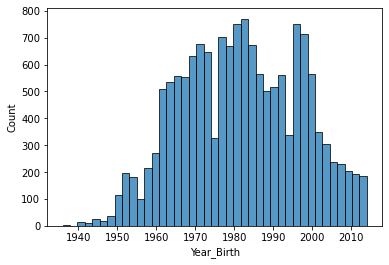

In [260]:
sns.histplot(data=data, x='Year_Birth')

No outliers found.

<h2>Data Preprocessing</h2>

<h4> Power Transformation for Reward Points <h4>

<p>We will now apply a power transformation to make data more Gaussian-like.</p>

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

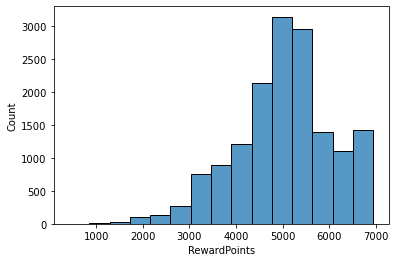

In [261]:
sns.histplot(data=data, x='RewardPoints', bins = 15)

In [262]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(data["RewardPoints"].values.reshape(-1, 1))
#print(pt.lambdas_)
data['RewardPoints'] = pt.transform(data["RewardPoints"].values.reshape(-1, 1))

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

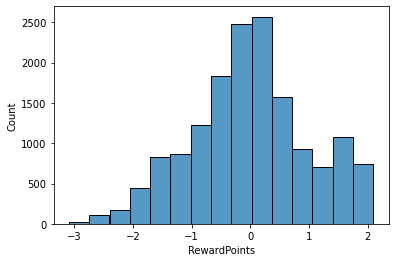

In [263]:
sns.histplot(data=data, x='RewardPoints', bins = 15)

<h4>Using KNN imputer for the missing values in Year_Birth <h4>

In [264]:
# creating an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputer.fit(data['Year_Birth'].values.reshape(-1, 1))
data['Year_Birth'] = imputer.transform(data['Year_Birth'].values.reshape(-1, 1))



In [265]:
data.isna().sum()

Cust_ID              0
Churn                0
Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

<p> As demonstrated above, our data frame no longer has missing values. They have been imputed as the means of k-Nearest Neighbor values. </p>

<h4>Transform Year_Birth to age</h4>

We will now transform the variable Year_Birth to age. We will not use this new variable in our models, but it will be useful in order to better undestand the charactheristics of the population we are dealing with.

In [266]:
today = date.today()

age = today.year - data['Year_Birth']
print(age)

0        48.0
1        57.0
2        49.0
3        29.0
4        33.0
         ... 
15584    34.0
15585    22.0
15586    58.0
15587    30.0
15588    39.0
Name: Year_Birth, Length: 15589, dtype: float64


Text(0.5, 0, 'Age')

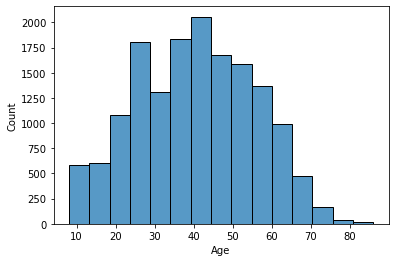

In [267]:
AgePlot = sns.histplot(data=age, x=age, bins = 15)
AgePlot.set_xlabel("Age")

In [268]:
age.mean()

40.293555930882114

We can conclude that the average age of the people in our dataset is around 40 years old. We will now plot the relation between TypeTravel and Year_Birth to check if there are any outliers in that.

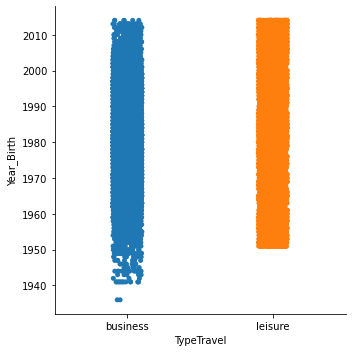

In [269]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

It appears that there are two isolated dots from very old people who are still going on business trips. We will consider these outliers and therefore remove them.

In [270]:
data.drop(data[(data['Year_Birth'] < 1937) & (data['TypeTravel'] == "business")].index, inplace = True)

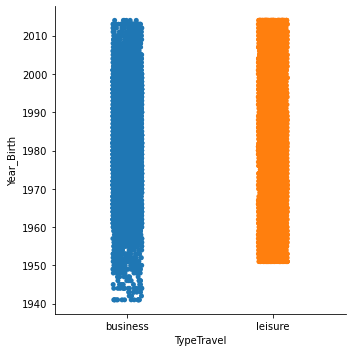

In [271]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

<h3>Transform Name in gender </h3>

Since "Name" is not a useful variable for our models, we will transform it to gender. This new variable gives us much better information.

In [272]:
gender = []
for i in data["Name"]:
    if i[:2] == "Mr":
        gender.append(1)
    else:
        gender.append(0)
        i
data["Name"] = gender
data = data.rename(columns = {"Name":"Male"})


<h4>Change Data types</h4>

Replacing the data from longevity to 1 and 0
Yes=1 No=0

In [273]:
data['Longevity'].value_counts()

yes    12546
no      2874
y        167
Name: Longevity, dtype: int64

In [274]:
data['Longevity'].replace(to_replace = 'yes',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'y',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'no',value = 0, inplace = True)
data['Longevity'].value_counts()

1    12713
0     2874
Name: Longevity, dtype: int64

<h4>Changing the Values of Column "TypeTravel"</h4>

<p>business = 1 leisure = 0 </p>

In [275]:
data['TypeTravel'].value_counts()

business    10754
leisure      4833
Name: TypeTravel, dtype: int64

In [276]:
data['TypeTravel'].replace(to_replace = 'business',value = 1, inplace = True)
data['TypeTravel'].replace(to_replace = 'leisure',value = 0, inplace = True)
data['TypeTravel'].value_counts()

1    10754
0     4833
Name: TypeTravel, dtype: int64

<h4>Changing the Values of Column "Wifi"</h4>

<p>6 were Replaced by 5 </p>

<AxesSubplot:xlabel='Wifi'>

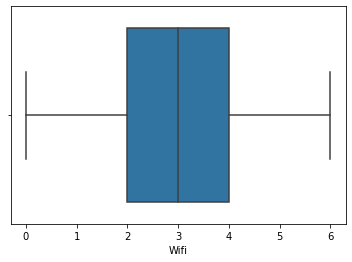

In [277]:
sns.boxplot(x="Wifi", data = data[['Wifi']])

Since the data range goes from 0 to 5, it doesn't make sense to have Wifi evaluated as a 6.

In [278]:
data['Wifi'].value_counts()

4    3704
5    3446
3    3346
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

In [279]:
data['Wifi'].replace(to_replace = 6,value = 5, inplace = True)
data['Wifi'].value_counts()

4    3704
5    3482
3    3346
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

In [280]:
data['Wifi'].max()

5

Now Wifi is evaluated from 0 to 5, like all the other variables.

<h4>Changing the Values of Column "Churn"</h4>

<p>convert "churn" and "nochurn" to 1 (True) and 0 (False) </p>

In [281]:
data['Churn'].value_counts()

nochurn    8477
churn      7110
Name: Churn, dtype: int64

In [282]:
data['Churn'].replace(to_replace = 'churn',value = 1, inplace = True)
data['Churn'].replace(to_replace = 'nochurn',value = 0, inplace = True)
data['Churn'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15587 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15587 non-null  int64  
 1   Churn              15587 non-null  int64  
 2   Male               15587 non-null  int64  
 3   Longevity          15587 non-null  int64  
 4   Year_Birth         15587 non-null  float64
 5   TypeTravel         15587 non-null  int64  
 6   RoomType           15587 non-null  object 
 7   RewardPoints       15587 non-null  float64
 8   Comfort            15587 non-null  int64  
 9   ReceptionSchedule  15587 non-null  int64  
 10  FoodDrink          15587 non-null  int64  
 11  Location           15587 non-null  int64  
 12  Wifi               15587 non-null  int64  
 13  Amenities          15587 non-null  int64  
 14  Staff              15587 non-null  int64  
 15  OnlineBooking      15587 non-null  int64  
 16  PriceQuality       155

Changing the type of Year_Birth to int32

<p>After applying the power transformation to Year_Birth, some years became non-integer values. Since this does not make sense, we changed the type of this variable to int in order to round those values. </p>

In [283]:
data['Year_Birth']=data['Year_Birth'].astype(int)
data.head(4)

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,1,0,1,1974,1,single,-0.184038,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,0,1,1,1965,1,single,1.817457,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,1,1,1,1973,1,single,-0.700780,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,0,0,1,1993,0,double,-1.155980,1,1,...,4,4,5,4,4,4,4,4,4,3


<h4>Room Type change</h4>

In [284]:
data['RoomType'].value_counts()

single    7440
double    7021
suite     1126
Name: RoomType, dtype: int64

<h4>Ordinal Encoding for column RoomType</h4>

In [285]:
data['RoomType'].replace(to_replace = 'suite',value = 2, inplace = True)
data['RoomType'].replace(to_replace = 'double',value = 1, inplace = True)
data['RoomType'].replace(to_replace = 'single',value = 0, inplace = True)
data['RoomType'].value_counts()

0    7440
1    7021
2    1126
Name: RoomType, dtype: int64

<h4>Pearson Correlation Heatmap</h4>

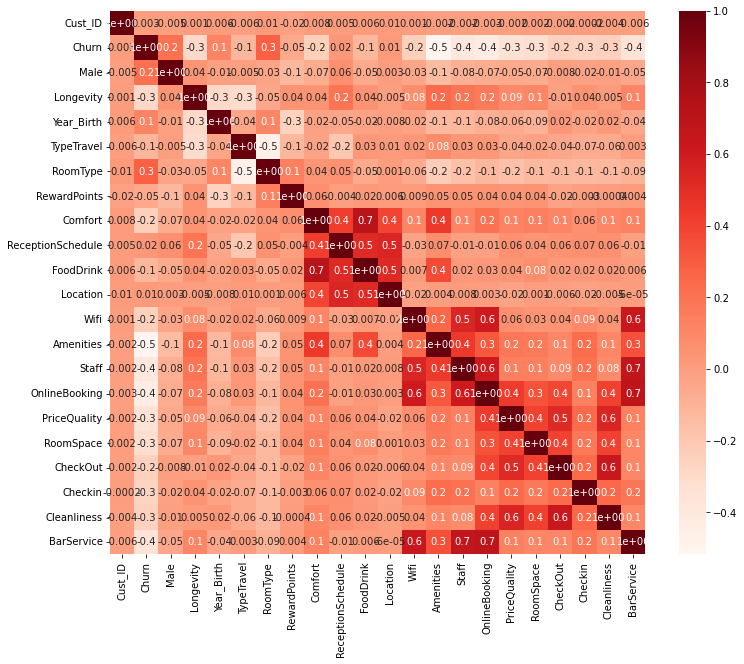

In [286]:
#Pearson correlation
cor_pearson= data.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

<h4>Feature Selection</h4>

<p>With the correlation map we were able see which features had a greater impact on the outcome (Churn) and which ones didn't. It also allowed us to see that there are some features that have a high correlation between them. </p>

In [287]:
unscaled_data = data.copy()

In [288]:
data.drop(columns=['Cust_ID'], inplace=True)

<h4>Scaling<h4>

<p>Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a MinMax Normalization.</p>

In [289]:
scaler = RobustScaler().fit(data)
minmax_train = scaler.transform(data)

data = pd.DataFrame(minmax_train, columns = data.columns)
data.head()

,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1.0,0.0,0.0,-0.291667,0.0,-1.0,-0.149580,0.0,0.5,-1.0,...,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5
1,0.0,1.0,0.0,-0.666667,0.0,-1.0,1.503639,-1.0,-1.0,-1.0,...,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5
2,1.0,1.0,0.0,-0.333333,0.0,-1.0,-0.576405,0.0,0.0,0.0,...,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0
3,0.0,0.0,0.0,0.500000,-1.0,0.0,-0.952397,-1.0,-1.0,-1.0,...,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.333333,0.0,-1.0,0.245099,-0.5,-0.5,0.0,...,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0


<h4> Perspectives </h4>

In [290]:
data_satisfaction = data[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.5,-1.5,-0.5,-0.5,0.0,-1.0,0.0,-0.333333,0.0,0.333333,-1.5,0.0,0.0,0.0
15583,0.0,0.0,0.0,0.0,1.0,-0.5,0.5,0.333333,-1.0,-1.000000,-0.5,1.0,0.0,1.0
15584,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,2.0,0.0,0.5
15585,0.5,0.0,0.5,0.5,1.0,0.0,0.5,0.333333,-2.0,0.333333,0.0,0.0,0.0,1.0


In [291]:
data_customer = data[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].copy()
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn
0,0.0,0.0,-0.291667,0.0,-0.149580,-1.0,1.0
1,1.0,0.0,-0.666667,0.0,1.503639,-1.0,0.0
2,1.0,0.0,-0.333333,0.0,-0.576405,-1.0,1.0
3,0.0,0.0,0.500000,-1.0,-0.952397,0.0,0.0
4,1.0,0.0,0.333333,0.0,0.245099,-1.0,0.0
...,...,...,...,...,...,...,...
15582,0.0,-1.0,0.291667,0.0,-0.099557,0.0,1.0
15583,0.0,-1.0,0.791667,0.0,-0.097911,0.0,1.0
15584,1.0,0.0,-0.708333,0.0,-0.812429,-1.0,0.0
15585,1.0,0.0,0.458333,-1.0,0.056247,0.0,0.0


<h3>Modelling</h3>

<h4>K-Means</h4>

<h4> Elbow Method </h4>

In [292]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(data_satisfaction)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

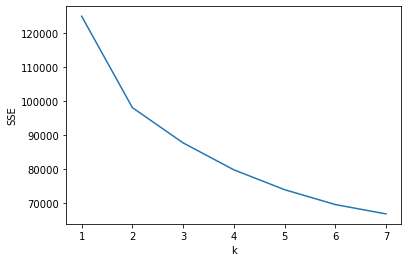

In [293]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)
# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

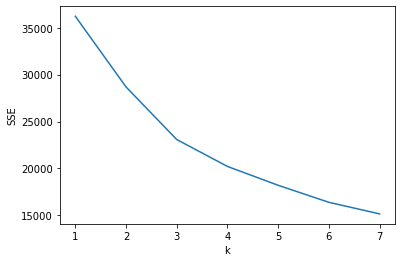

In [294]:
ks = range(1, 8)
inertias = []

for k in ks:
    
    model = KMeans(n_clusters=k)

    
    model.fit(data_customer)

    
    inertias.append(model.inertia_)


plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

<h4>Dendogram</h4>

In [295]:
#hclustering = linkage(data_satisfaction, 'complete') 
#hclustering = linkage(data_satisfaction, 'average')
#hclustering = linkage(data_satisfaction, 'single')
hclustering = linkage(data_customer, 'ward')

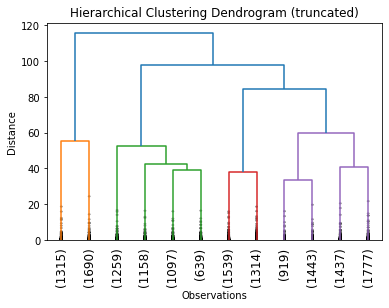

In [296]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

In [ ]:
hclustering = linkage(data_satisfaction, 'ward')

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

<h4> Applying K-Means </h4>

In [297]:
model_KMeans_satisfaction = KMeans(n_clusters=2)

model_KMeans_satisfaction.fit(data_satisfaction)

KMeans(n_clusters=2)

In [298]:
model_KMeans_customer = KMeans(n_clusters=3)

model_KMeans_customer.fit(data_customer)

KMeans(n_clusters=3)

In [299]:
model_KMeans_satisfaction.cluster_centers_

array([[-0.24030274, -0.11289814, -0.16579943, -0.0119836 , -0.04036582,
        -0.58293914, -0.49582151, -0.42210659, -1.61305582, -0.37716809,
        -0.51474298, -0.52554399, -0.52459792, -0.06204667],
       [ 0.03131422,  0.07517577, -0.01725257, -0.00351541,  0.23239589,
        -0.12709573, -0.07593294, -0.01716243,  0.1957815 , -0.03865152,
         0.10075717,  0.91238507,  0.10070308,  0.33542455]])

In [300]:
model_KMeans_customer.cluster_centers_

array([[ 0.33505554, -0.03125807, -0.46827908, -0.31180573,  1.03471632,
        -0.49108757,  0.27357272],
       [ 0.50618209, -0.18565006,  0.02568065, -0.01479955, -0.6326931 ,
        -0.97152492,  0.30048707],
       [ 0.56491063, -0.27626215,  0.33435246, -0.55613045, -0.09200694,
         0.12119787,  0.69724051]])

In [301]:
data_satisfaction['label'] = model_KMeans_satisfaction.labels_
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5,1
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5,1
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0,0
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.5,-1.5,-0.5,-0.5,0.0,-1.0,0.0,-0.333333,0.0,0.333333,-1.5,0.0,0.0,0.0,0
15583,0.0,0.0,0.0,0.0,1.0,-0.5,0.5,0.333333,-1.0,-1.000000,-0.5,1.0,0.0,1.0,1
15584,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,2.0,0.0,0.5,1
15585,0.5,0.0,0.5,0.5,1.0,0.0,0.5,0.333333,-2.0,0.333333,0.0,0.0,0.0,1.0,0


In [302]:
data_customer['label'] = model_KMeans_customer.labels_
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label
0,0.0,0.0,-0.291667,0.0,-0.149580,-1.0,1.0,1
1,1.0,0.0,-0.666667,0.0,1.503639,-1.0,0.0,0
2,1.0,0.0,-0.333333,0.0,-0.576405,-1.0,1.0,1
3,0.0,0.0,0.500000,-1.0,-0.952397,0.0,0.0,2
4,1.0,0.0,0.333333,0.0,0.245099,-1.0,0.0,1
...,...,...,...,...,...,...,...,...
15582,0.0,-1.0,0.291667,0.0,-0.099557,0.0,1.0,2
15583,0.0,-1.0,0.791667,0.0,-0.097911,0.0,1.0,2
15584,1.0,0.0,-0.708333,0.0,-0.812429,-1.0,0.0,1
15585,1.0,0.0,0.458333,-1.0,0.056247,0.0,0.0,2


<h2> Assessment </h2>

In [303]:
descr_satisfaction = data_satisfaction.groupby(['label']).describe().transpose()
descr_satisfaction

label                       0            1
Comfort    count  6344.000000  9243.000000
           mean     -0.240542     0.031537
           std       0.642194     0.707035
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.500000    -1.000000
           25%      -0.500000     0.000000
           50%       0.000000     0.500000
           75%       0.500000     1.000000
           max       1.000000     1.000000

[112 rows x 2 columns]

In [304]:
descr_customer = data_customer.groupby(['label']).describe().transpose()
descr_customer

label                         0            1            2
Male         count  3869.000000  5339.000000  6379.000000
             mean      0.334970     0.506649     0.564509
             std       0.472041     0.500003     0.495860
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       0.000000     1.000000     1.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000
Longevity    count  3869.000000  5339.000000  6379.000000
             mean     -0.031016    -0.185428    -0.276532
             std       0.173383     0.388681     0.447318
             min      -1.000000    -1.000000    -1.000000
             25%       0.000000     0.000000    -1.000000
             50%       0.000000     0.000000     0.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
Year_Birth   count  3869.000000  5339.000000  6379.000000
             mean     -0.468661     0.024833     0.335090
             std       0.415602     0.525137     0.620300
             min      -1.666667    -1.666667    -1.416667
             25%      -0.750000    -0.375000    -0.041667
             50%      -0.458333     0.000000     0.458333
             75%      -0.166667     0.458333     0.791667
             max       0.791667     1.375000     1.375000
TypeTravel   count  3869.000000  5339.000000  6379.000000
             mean     -0.312225    -0.014422    -0.556200
             std       0.463461     0.119234     0.496870
             min      -1.000000    -1.000000    -1.000000
             25%      -1.000000     0.000000    -1.000000
             50%       0.000000     0.000000    -1.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
RewardPoints count  3869.000000  5339.000000  6379.000000
             mean      1.035046    -0.631456    -0.092804
             std       0.437986     0.634952     0.469681
             min      -0.351217    -2.551146    -2.105604
             25%       0.706460    -1.131201    -0.363445
             50%       1.133647    -0.558947    -0.044989
             75%       1.398230    -0.093380     0.231256
             max       1.731946     0.716569     1.090401
RoomType     count  3869.000000  5339.000000  6379.000000
             mean     -0.490308    -0.971905     0.121022
             std       0.599225     0.165260     0.388888
             min      -1.000000    -1.000000    -1.000000
             25%      -1.000000    -1.000000     0.000000
             50%      -1.000000    -1.000000     0.000000
             75%       0.000000    -1.000000     0.000000
             max       1.000000     0.000000     1.000000
Churn        count  3869.000000  5339.000000  6379.000000
             mean      0.273973     0.300243     0.697131
             std       0.446053     0.458407     0.459535
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       0.000000     0.000000     1.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000

<h3>Visualizing the results </h3>

In [305]:
cluster0_satisfaction = data_satisfaction[data_satisfaction.label==0]
cluster1_satisfaction = data_satisfaction[data_satisfaction.label==1]

In [306]:
cluster0_customer = data_customer[data_customer.label==0]
cluster1_customer = data_customer[data_customer.label==1]
cluster2_customer = data_customer[data_customer.label==2]

c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


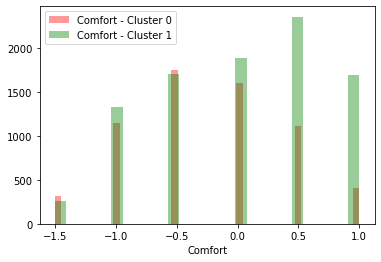

In [307]:
sns.distplot(cluster0_satisfaction['Comfort'],color='red',label='Comfort - Cluster 0', kde = False)
sns.distplot(cluster1_satisfaction['Comfort'],color='green',label='Comfort - Cluster 1', kde = False)
plt.legend()

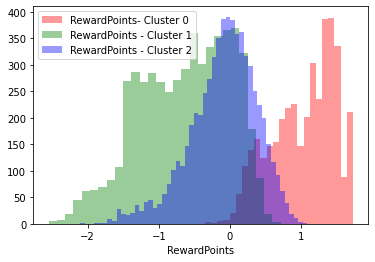

In [308]:
sns.distplot(cluster0_customer['RewardPoints'],color='red',label='RewardPoints- Cluster 0', kde = False)
sns.distplot(cluster1_customer['RewardPoints'],color='green',label='RewardPoints - Cluster 1', kde = False)
sns.distplot(cluster2_customer['RewardPoints'],color='blue',label='RewardPoints - Cluster 2', kde = False)
plt.legend()

<h2>SOM Data Satisfaction</h2>

In [309]:
df_som = np.float32(data_satisfaction.values)

In [310]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [311]:
som = SOMFactory().build(df_som, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [312]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

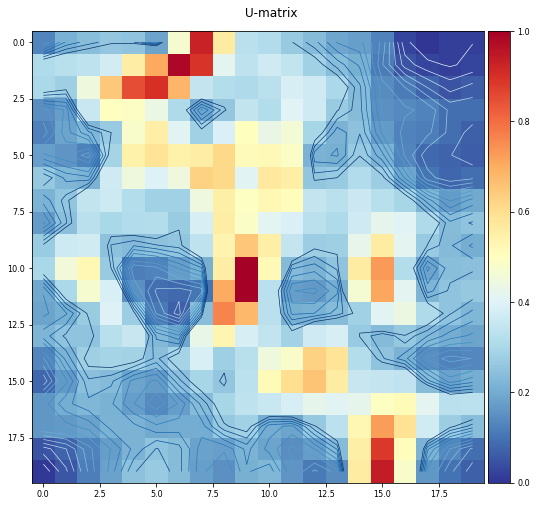

In [313]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


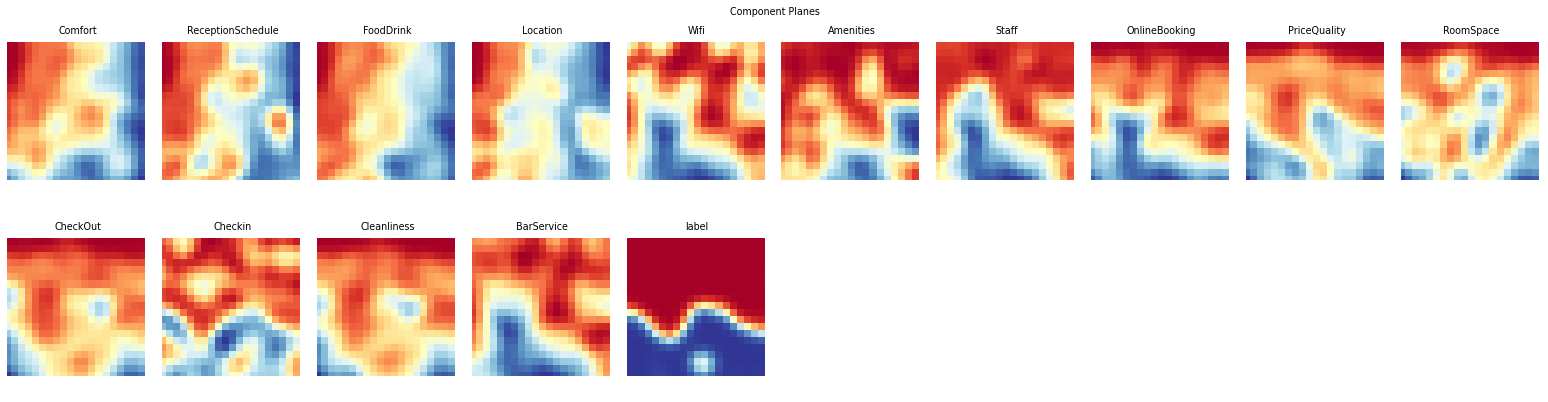

In [314]:
som.component_names = data_satisfaction.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [315]:
bmus = som.project_data(df_som)
bmus

array([151,  59, 364, ..., 139, 211, 288])

In [316]:
cl = som.cluster(n_clusters=2)

In [317]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

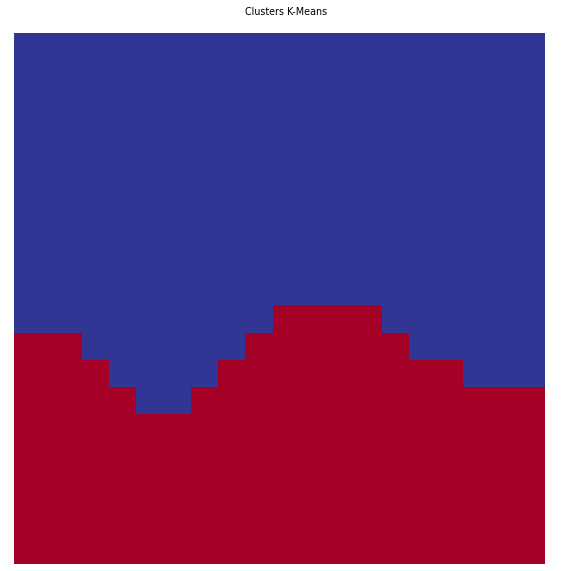

In [318]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

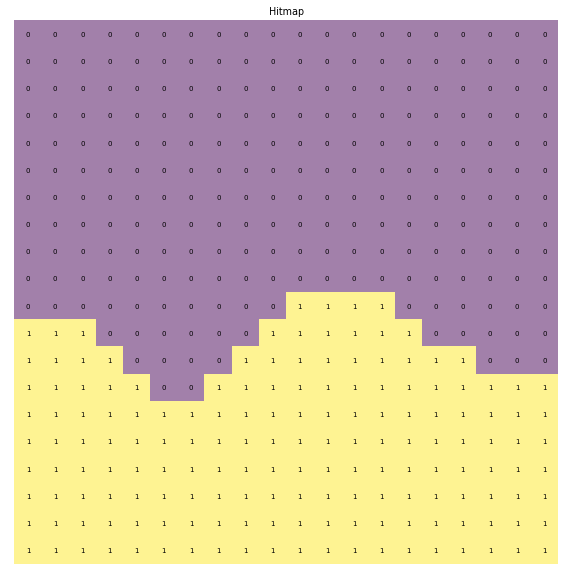

In [319]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [320]:
bmus = som.project_data(df_som)
data_satisfaction['bmu'] = bmus

In [321]:
data_satisfaction['label'] = labels[data_satisfaction['bmu']]
data_satisfaction.head(10)

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label,bmu
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5,0,151
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5,0,59
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0,1,364
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0,119
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0,0,75
5,-0.5,-0.5,1.0,1.0,0.0,-1.0,-1.0,-0.666667,-2.0,-0.666667,-1.0,1.0,-1.0,-1.0,1,342
6,-0.5,-0.5,-0.5,0.0,-0.5,-1.0,-1.0,-0.666667,-3.0,-1.000000,-1.0,-1.0,-0.5,-0.5,1,395
7,-0.5,0.0,0.0,0.0,-0.5,0.0,0.0,-0.666667,-2.0,-0.333333,-1.0,-2.0,-1.0,-0.5,1,383
8,-0.5,0.0,0.0,0.0,-0.5,-1.0,-1.0,-0.666667,-2.0,-1.000000,-1.0,-1.0,-1.0,-1.0,1,383
9,0.0,1.0,1.0,1.0,0.0,-0.5,-0.5,-0.333333,0.0,-0.333333,0.0,-2.0,0.0,0.0,1,242


In [322]:
df_final = data.copy(deep=True)
df_final['label'] = data_satisfaction['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                       0            1
Comfort    count  9147.000000  6440.000000
           mean      0.044003    -0.254193
           std       0.702572     0.643204
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.000000    -1.500000
           25%       0.000000    -0.500000
           50%       0.500000     0.000000
           75%       1.000000     0.500000
           max       1.000000     1.000000

[112 rows x 2 columns]

<h2>SOM Data customer</h2>

In [323]:
df_som_customer = np.float32(data_customer.values)

In [324]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [325]:
som = SOMFactory().build(df_som_customer, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [326]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

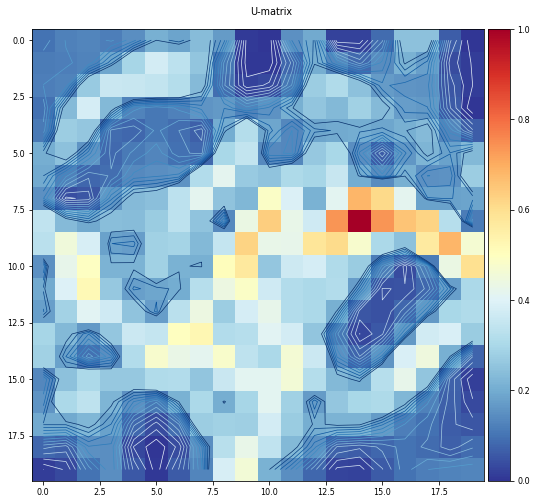

In [327]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


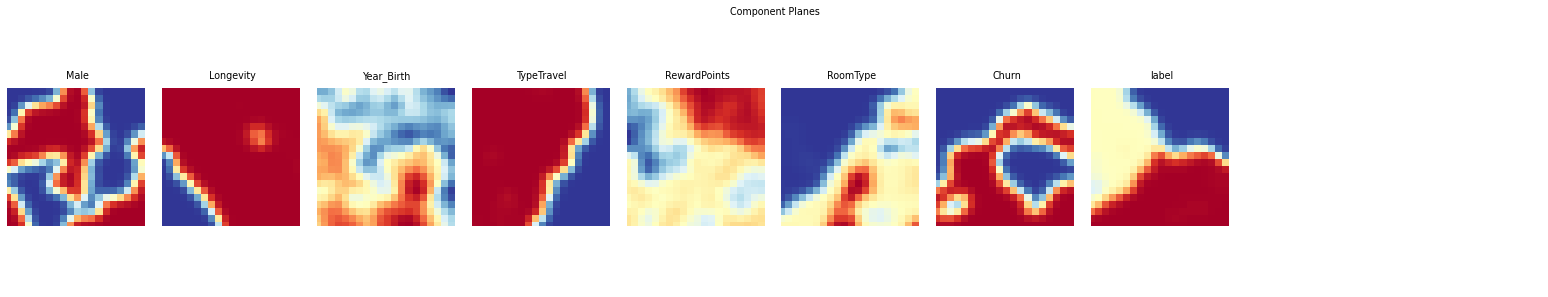

In [328]:
som.component_names = data_customer.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [329]:
bmus = som.project_data(df_som_customer)
bmus

array([226,  51, 167, ...,  64, 334, 290])

In [330]:
cl = som.cluster(n_clusters=3)

In [331]:
labels = getattr(som, 'cluster_labels')
labels

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

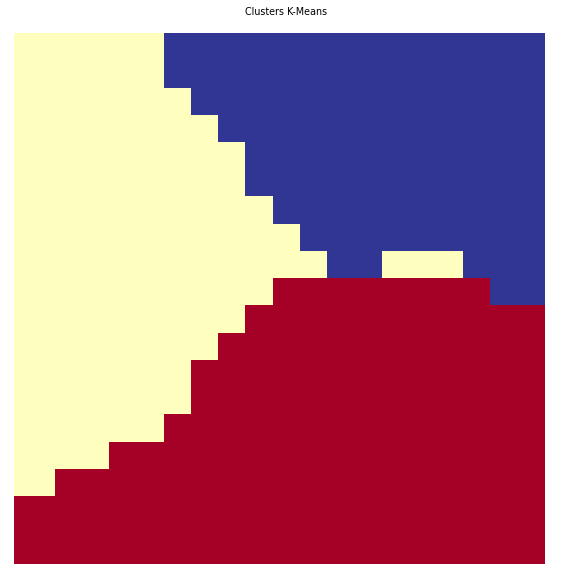

In [332]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

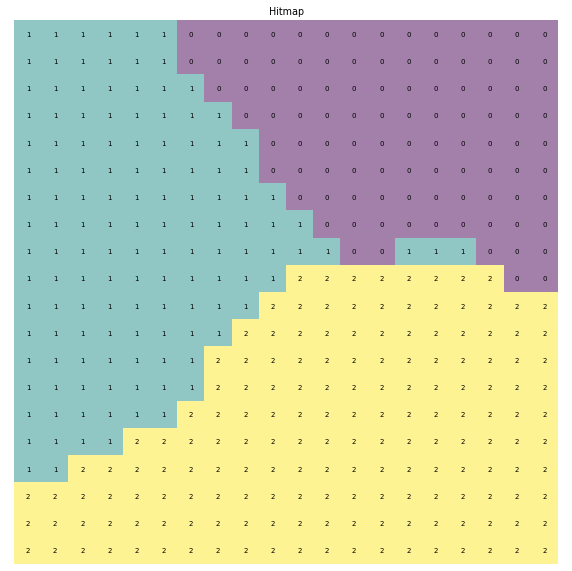

In [333]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [334]:
bmus = som.project_data(df_som_customer)
data_customer['bmu'] = bmus

In [335]:
data_customer['label'] = labels[data_customer['bmu']]
data_customer.head(10)

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label,bmu
0,0.0,0.0,-0.291667,0.0,-0.149580,-1.0,1.0,1,226
1,1.0,0.0,-0.666667,0.0,1.503639,-1.0,0.0,0,51
2,1.0,0.0,-0.333333,0.0,-0.576405,-1.0,1.0,1,167
3,0.0,0.0,0.500000,-1.0,-0.952397,0.0,0.0,2,276
4,1.0,0.0,0.333333,0.0,0.245099,-1.0,0.0,1,126
5,0.0,0.0,-0.250000,0.0,0.215715,0.0,1.0,2,307
6,0.0,-1.0,0.375000,0.0,-0.147946,0.0,1.0,2,345
7,1.0,0.0,-0.208333,0.0,-0.818921,-1.0,1.0,1,167
8,1.0,0.0,-0.291667,0.0,-1.059353,-1.0,1.0,1,167
9,1.0,0.0,0.541667,0.0,-1.205625,-1.0,1.0,1,183


In [336]:
df_final = data.copy(deep=True)
df_final['label'] = data_customer['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].describe().T
descr

label                         0            1            2
Male         count  3768.000000  5362.000000  6457.000000
             mean      0.337845     0.498881     0.565897
             std       0.473038     0.500045     0.495677
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       0.000000     0.000000     1.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000
Longevity    count  3768.000000  5362.000000  6457.000000
             mean     -0.009289    -0.201604    -0.272263
             std       0.095942     0.401235     0.445159
             min      -1.000000    -1.000000    -1.000000
             25%       0.000000     0.000000    -1.000000
             50%       0.000000     0.000000     0.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
Year_Birth   count  3768.000000  5362.000000  6457.000000
             mean     -0.481223     0.027710     0.328565
             std       0.406507     0.524998     0.621005
             min      -1.666667    -1.666667    -1.416667
             25%      -0.750000    -0.375000    -0.041667
             50%      -0.458333     0.000000     0.416667
             75%      -0.166667     0.458333     0.791667
             max       0.750000     1.375000     1.375000
TypeTravel   count  3768.000000  5362.000000  6457.000000
             mean     -0.317675    -0.010071    -0.554747
             std       0.465634     0.099856     0.497032
             min      -1.000000    -1.000000    -1.000000
             25%      -1.000000     0.000000    -1.000000
             50%       0.000000     0.000000    -1.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
RewardPoints count  3768.000000  5362.000000  6457.000000
             mean      1.046716    -0.596723    -0.108897
             std       0.437662     0.655368     0.480656
             min      -0.661323    -2.551146    -2.529167
             25%       0.734980    -1.110762    -0.385077
             50%       1.147142    -0.526150    -0.057432
             75%       1.405157    -0.057432     0.221755
             max       1.731946     1.039721     1.090401
RoomType     count  3768.000000  5362.000000  6457.000000
             mean     -0.478503    -0.986199     0.120335
             std       0.601356     0.116674     0.385515
             min      -1.000000    -1.000000    -1.000000
             25%      -1.000000    -1.000000     0.000000
             50%      -1.000000    -1.000000     0.000000
             75%       0.000000    -1.000000     0.000000
             max       1.000000     0.000000     1.000000
Churn        count  3768.000000  5362.000000  6457.000000
             mean      0.267516     0.306416     0.690568
             std       0.442722     0.461047     0.462295
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       0.000000     0.000000     1.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000

<h2>Exploring the Results </h2>

In [337]:
# add labels from satisfaction perspective
unscaled_data['label_sat'] = list(data_satisfaction['label'])
# add labels from customer value perspective
unscaled_data['label_cust'] = list(data_customer['label'])
unscaled_data.head()

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label_sat,label_cust
0,1,1,0,1,1974,1,0,-0.184038,3,4,...,4,3,3,3,3,4,3,4,0,1
1,2,0,1,1,1965,1,0,1.817457,1,1,...,4,5,5,5,5,1,5,2,0,0
2,3,1,1,1,1973,1,0,-0.700780,3,3,...,4,3,3,2,3,2,3,1,1,1
3,4,0,0,1,1993,0,1,-1.155980,1,1,...,5,4,4,4,4,4,4,3,0,2
4,5,0,1,1,1989,1,0,0.293787,2,2,...,5,5,5,3,4,1,3,5,0,1


In [338]:
#'Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService'
centroids_satisfaction = [[-0.24042251, -0.11303799, -0.16593095, -0.01213937, -0.04028062,
        -0.58308371, -0.49574334, -0.42204004, -1.61280151, -0.37716118,
        -0.51466183, -0.52546114, -0.52451521, -0.06219455],
       [ 0.03142579,  0.07529208, -0.01714626, -0.00340762,  0.23236694,
        -0.12694721, -0.07594115, -0.01716429,  0.19580268, -0.03861965,
         0.10076807,  0.91248377,  0.10071398,  0.33556902]]

In [339]:
centroid_0_Comfort = centroids_satisfaction[0][0]
centroid_1_Comfort = centroids_satisfaction[1][0]
centroid_0_ReceptionSchedule = centroids_satisfaction[0][1]
centroid_1_ReceptionSchedule = centroids_satisfaction[1][1]
centroid_0_FoodDrink = centroids_satisfaction[0][2]
centroid_1_FoodDrink = centroids_satisfaction[1][2]
centroid_0_Location = centroids_satisfaction[0][3]
centroid_1_Location = centroids_satisfaction[1][3]
centroid_0_Wifi = centroids_satisfaction[0][4]
centroid_1_Wifi = centroids_satisfaction[1][4]
centroid_0_Amenities = centroids_satisfaction[0][5]
centroid_1_Amenities = centroids_satisfaction[1][5]
centroid_0_Staff = centroids_satisfaction[0][6]
centroid_1_Staff = centroids_satisfaction[1][6]
centroid_0_OnlineBooking = centroids_satisfaction[0][7]
centroid_1_OnlineBooking = centroids_satisfaction[1][7]
centroid_0_PriceQuality = centroids_satisfaction[0][8]
centroid_1_PriceQuality = centroids_satisfaction[1][8]
centroid_0_RoomSpace = centroids_satisfaction[0][9]
centroid_1_RoomSpace = centroids_satisfaction[1][9]
centroid_0_CheckOut = centroids_satisfaction[0][10]
centroid_1_CheckOut = centroids_satisfaction[1][10]
centroid_0_Checkin = centroids_satisfaction[0][11]
centroid_1_Checkin = centroids_satisfaction[1][11]
centroid_0_Cleanliness = centroids_satisfaction[0][12]
centroid_1_Cleanliness = centroids_satisfaction[1][12]
centroid_0_BarService = centroids_satisfaction[0][13]
centroid_1_BarService = centroids_satisfaction[1][13]

In [340]:
#'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn'
centroids_customer = [[ 0.50674916, -0.18428946,  0.02273153, -0.01499813, -0.63340051,
        -0.97131609,  0.29865017],
       [ 0.56404635, -0.2773254 ,  0.33642604, -0.55480739, -0.09163078,
         0.11916693,  0.69761979],
       [ 0.33540212, -0.03103181, -0.46878502, -0.31290406,  1.03567708,
        -0.48978536,  0.2746315 ]]

In [341]:
centroid_0_Male = centroids_customer[0][0]
centroid_1_Male = centroids_customer[1][0]
centroid_2_Male = centroids_customer[2][0]
centroid_0_Longevity = centroids_customer[0][1]
centroid_1_Longevity = centroids_customer[1][1]
centroid_2_Longevity = centroids_customer[2][1]
centroid_0_Year_Birth = centroids_customer[0][2]
centroid_1_Year_Birth = centroids_customer[1][2]
centroid_2_Year_Birth = centroids_customer[2][2]
centroid_0_TypeTravel = centroids_customer[0][3]
centroid_1_TypeTravel = centroids_customer[1][3]
centroid_2_TypeTravel = centroids_customer[2][3]
centroid_0_RewardPoints = centroids_customer[0][4]
centroid_1_RewardPoints = centroids_customer[1][4]
centroid_2_RewardPoints = centroids_customer[2][4]
centroid_0_RoomType = centroids_customer[0][5]
centroid_1_RoomType = centroids_customer[1][5]
centroid_2_RoomType = centroids_customer[2][5]
centroid_0_Churn = centroids_customer[0][6]
centroid_1_Churn = centroids_customer[1][6]
centroid_2_Churn = centroids_customer[2][6]



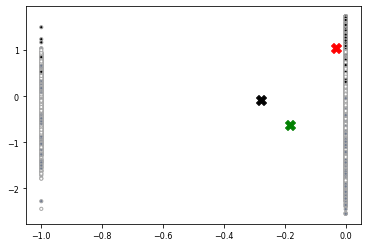

In [344]:
plt.scatter(data['Longevity'], data['RewardPoints'], c=unscaled_data.label_cust, s=10, edgecolors='darkgrey', cmap='bone')
plt.scatter(centroid_0_Longevity, centroid_0_RewardPoints, marker='X', s=100, color='green')
plt.scatter(centroid_1_Longevity, centroid_1_RewardPoints, marker='X', s=100, color='black')
plt.scatter(centroid_2_Longevity, centroid_2_RewardPoints, marker='X', s=100,color='red')
plt.show()

<AxesSubplot:xlabel='count', ylabel='BarService'>

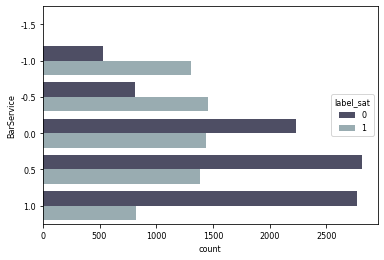

In [ ]:
sns.countplot(y = 'BarService', hue = 'label_sat', data = data, palette='bone')

<h2>Join Clusters</h2>

In [ ]:
descr = data.reset_index(drop=True)
descr = descr.groupby(['label_sat', 'label_cust'])[['','','','','']].agg(['count','mean','max','min'])
descr

KeyError: 'label_cust'

In [ ]:
data['final_label'] = data['label_sat'].astype(str) + data['label_cust'].astype(str)
data.head()